In [1]:
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
pd.options.display.float_format = '{:,.4f}%'.format
pd.set_option('display.max_rows', 700)

In [3]:
files =  glob.glob("../dados_*/*.dat")

In [4]:
len(files)

1320

In [5]:
arquivos_processados = []
for arquivo in files:
    arquivo = arquivo.replace(".dat", "")
    arquivos_processados.extend([arquivo.split("/")[-1].split('_')])

In [6]:
df_arquivos_processados = pd.DataFrame(arquivos_processados)
df_arquivos_processados.columns = ['nuclei', 'distance', 'estories', 'multichannel_start']

In [7]:
df_arquivos_processados.groupby(['nuclei', 'distance']).count()

estories  multichannel_start
nuclei distance                              
Am-241 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Ba-133 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Cd-109 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Co-57  41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Co-60  41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Cs-137 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Eu-152 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Mn-54  41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Na-22  41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33
Pb-210 41cm            33                  33
       46cm            33                  33
       51cm            33                  33
       56cm            33                  33

In [8]:
df_arquivos_processados.groupby(['nuclei', 'distance', 'estories']).count()

multichannel_start
nuclei distance estories                          
Am-241 41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Ba-133 41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Cd-109 41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Co-57  41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Co-60  41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Cs-137 41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       51cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       56cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
Eu-152 41cm     1-0e07estories                  11
                1-0e08estories                  11
                1-0e09estories                  11
       46cm     1-0e07estories                  11
                1-0e08estories                  11
   

In [9]:
list(df_arquivos_processados.multichannel_start.unique())

['1', '250', '400', '150', '300', '0']

In [10]:
def carrega_dados(filename, n_particulas=1.0e07):
    data = {
        'Elow(eV)' : [],
        'Emiddle(eV)' : [],
        'counts(1/eV/hist)' : [],
        '+-2sigma':[],
        'nbin' : []
    }

    linha_de_dados = False
    with open(filename, "r") as f:
        for line in f:
            if line[0] == '#':
                linha_de_dados = False
            else:
                linha_de_dados = True

            if linha_de_dados:
                aux = line.split(' ')
                if len(aux) == 2:
                    break

                data['Elow(eV)'].append(np.fromstring(aux[2], dtype=np.float64, sep=',')[0])
                data['Emiddle(eV)'].append(np.fromstring(aux[4], dtype=np.float64, sep=',')[0])
                q = np.fromstring(aux[6], dtype=np.float64, sep=',')[0]
                data['counts(1/eV/hist)'].append(q)
                data['+-2sigma'].append(np.fromstring(aux[8], dtype=np.float64, sep=',')[0])
                nbin = np.fromstring(aux[9], dtype=np.int, sep=',')[0]
                data['nbin'].append(nbin)      

    df = pd.DataFrame.from_dict(data)
    df['counts'] = df['counts(1/eV/hist)'].values * n_particulas * 1 / ((df['Elow(eV)'].shift(-1).fillna(0) - df['Elow(eV)']) / df['nbin'])
    #df['counts'] = df['counts'].astype(np.uint8)
    df['counts'][0:20] = 0
    df['E'] = df['Elow(eV)'] / 1e3
    return df.loc[0:16383]

def gera_imagem_combinada(dicionario_imagens, n_combinacoes=3):
    assert n_combinacoes <= 10, "No máximo 10 combinações"

    aux = np.random.choice(dicionario_imagens, n_combinacoes, replace=False)
    #print(aux)
    labels = np.sum([x['y'] for x in aux], axis=0)
    values = np.sum([x['X'] for x in aux], axis=0)
    
    counts = np.zeros((10, ))
    for item in aux:
        counts[np.argmax(item['y'])] = np.sum(item['X'])
    
    while np.max(labels) > 1: # temos nuclideo repetido
        labels[0][np.argmax(labels[0])] = 1
    
    return values, labels, counts

# Gera massa de dados

## Treino

In [11]:
energias_iniciais_multicanal = ['1', '250', '400', '150', '300', '0']
#energias_iniciais_multicanal = ['0-01.dat']

In [46]:
nomes_nuclideos = {'Am-241': 0,
  'Ba-133': 1,
  'Cd-109': 2,
  'Co-57': 3,
  'Co-60': 4,
  'Cs-137': 5,
  'Eu-152': 6,
  'Mn-54': 7,
  'Na-22': 8,
  'Pb-210': 9}

binarizer = MultiLabelBinarizer()
binarizer.fit([list(nomes_nuclideos.keys())])
binarizer.classes_

array(['Am-241', 'Ba-133', 'Cd-109', 'Co-57', 'Co-60', 'Cs-137', 'Eu-152',
       'Mn-54', 'Na-22', 'Pb-210'], dtype=object)

In [14]:
# Cd-109_41cm_1-0e08estories_0-01.dat
dados_por_energia_inicial_multicanal = dict()

contagens_por_nuclideos = {
    'Am-241': [],
    'Ba-133': [],
    'Cd-109': [],
    'Co-57': [],
    'Co-60': [],
    'Cs-137': [],
    'Eu-152': [],
    'Mn-54': [],
    'Na-22': [],
    'Pb-210': []
}

for energia_inicial_multicanal in energias_iniciais_multicanal:
    dados_por_energia_inicial_multicanal[energia_inicial_multicanal] = []
    
    for file_ in tqdm_notebook(files):
        if not file_.endswith(energia_inicial_multicanal+'.dat'):
            continue
        
        partes = file_.split("/")[2].replace(".dat", "").split("_")
        nuclideo = partes[0]        
        distancia = partes[1]
        n_particulas = float(partes[2].replace('estories','').replace('-','.'))
        dados_ = carrega_dados(file_, n_particulas)
        
        contagens_por_nuclideos[nuclideo].append(np.sum(dados_.counts.values))
        
        dados_por_energia_inicial_multicanal[energia_inicial_multicanal].append({'X' : dados_.counts.values,
                                                                                 'n' : n_particulas,
                                                                                 'y': binarizer.transform([[nuclideo]]),
                                                                                 'd': distancia,
                                                                                 'e': energia_inicial_multicanal})

/home/andre/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
distancias = list(np.unique([x['d'] for x in dados_por_energia_inicial_multicanal[energias_iniciais_multicanal[0]]]))
n_particulas = list(np.unique([x['n'] for x in dados_por_energia_inicial_multicanal[energias_iniciais_multicanal[0]]]))

distancias, n_particulas

(['41cm', '46cm', '51cm', '56cm'], [10000000.0, 100000000.0, 1000000000.0])

### Gera espectros com mais de um radionuclideo

### Normalização das contagens

In [141]:
from sklearn.preprocessing import MinMaxScaler

scallers = {}

for key in contagens_por_nuclideos:
    scallers[key] = MinMaxScaler().fit(np.array([[x] for x in contagens_por_nuclideos[key]]))

In [142]:
scallers.keys()

dict_keys(['Am-241', 'Ba-133', 'Cd-109', 'Co-57', 'Co-60', 'Cs-137', 'Eu-152', 'Mn-54', 'Na-22', 'Pb-210'])

In [143]:
np.array(contagens_por_nuclideos['Am-241']).shape

(228,)

In [144]:
d_test = '56cm'
n_combinacoes = [2, 3, 4]
novos_dados = dict()

# agrupa a leitura por energia inicial do multicanal e distancia, assim 
for key in energias_iniciais_multicanal:
    novos_dados[key] = []
    for distancia in [x for x in distancias if x != d_test]:
        for n_particula in n_particulas:
            aux_data = [x for x in dados_por_energia_inicial_multicanal[key]
                        if x['d'] == distancia and x['n'] == n_particula]
            
            for n_ in n_combinacoes:
                for i in range(25):
                    values, labels, counts = gera_imagem_combinada(aux_data, n_)
                    
                    new = np.zeros((10))
                    for idx, key_ in enumerate(contagens_por_nuclideos):
                        new[idx] = scallers[key_].transform([[counts[idx]]])[0][0]
                    
                    novos_dados[key].append({'X' : values,
                                             'y': labels,
                                             'y_counts': new})

In [145]:
X = []
y = []

In [146]:
for key in energias_iniciais_multicanal:
    for item in [x for x in dados_por_energia_inicial_multicanal[key] if x['d'] != d_test]:
        X.append(list(item.values())[0].reshape((128, 128)))
        aux_ = np.zeros((10, ))
        aux_[np.argmax(item['y'])] = scallers[key_].transform([[np.sum(item['X'])]])[0][0]
        y.append({'nuclei': item['y'][0],
                  'counts': aux_})

In [147]:
len(X), len(y)

(1710, 1710)

In [148]:
for key in energias_iniciais_multicanal:
    for item in novos_dados[key]:
        X.append(list(item.values())[0].reshape((128, 128)))
        aux_ = np.zeros((10, ))
        aux_[np.argmax(item['y'])] = scallers[key_].transform([[np.sum(item['X'])]])[0][0]
        y.append({'nuclei': item['y'][0],
                  'counts': aux_})

In [149]:
len(X), len(y)

(5760, 5760)

## Validação

In [150]:
X_test = []
y_test = []

In [151]:
n_combinacoes = [2, 3, 4]
novos_dados_test = dict()

# agrupa a leitura por energia inicial do multicanal e distancia, assim 
for key in energias_iniciais_multicanal:
    novos_dados_test[key] = []
    for distancia in [x for x in distancias if x == d_test]:
        for n_particula in n_particulas:
            aux_data = [x for x in dados_por_energia_inicial_multicanal[key]
                        if x['d'] == distancia and x['n'] == n_particula]
            
            for n_ in n_combinacoes:
                for i in range(5):
                    values, labels, counts = gera_imagem_combinada(aux_data, n_)
                    
                    new = np.zeros((10))
                    for idx, key_ in enumerate(contagens_por_nuclideos):
                        new[idx] = scallers[key_].transform([[counts[idx]]])[0][0]
                    
                    novos_dados[key].append({'X' : values,
                                             'y': labels,
                                             'y_counts': new})

In [152]:
for key in energias_iniciais_multicanal:
    for item in [x for x in dados_por_energia_inicial_multicanal[key] if x['d'] == d_test]:
        X_test.append(list(item.values())[0].reshape((128, 128)))
        aux_ = np.zeros((10, ))
        aux_[np.argmax(item['y'])] = scallers[key_].transform([[np.sum(item['X'])]])[0][0]
        y_test.append({'nuclei': item['y'][0],
                       'counts': aux_})

In [153]:
for key in energias_iniciais_multicanal:
    for item in novos_dados_test[key]:
        X_test.append(list(item.values())[0].reshape((128, 128)))
        aux_ = np.zeros((10, ))
        aux_[np.argmax(item['y'])] = scallers[key_].transform([[np.sum(item['X'])]])[0][0]
        y_test.append({'nuclei': item['y'][0],
                       'counts': aux_})

In [154]:
len(X), len(y), len(X_test), len(y_test)

(5760, 5760, 570, 570)

In [155]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

## Save data

In [156]:
with open("x.npy", "wb") as f:
    np.save(f, np.array(X))

In [157]:
with open("y.npy", "wb") as f:
    np.save(f, np.array(y))

In [158]:
with open("x_test.npy", "wb") as f:
    np.save(f, np.array(X_test))

In [159]:
with open("y_test.npy", "wb") as f:
    np.save(f, np.array(y_test))

# Modelo

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# Para o Modelo
import tensorflow as tf
import keras
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import top_k_categorical_accuracy
from keras.utils import to_categorical, Sequence
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [161]:
class EspectraSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        multiple_outputs = {'nuclei': np.array([x['nuclei'] for x in batch_y]),
                            'counts': np.array([x['counts'] for x in batch_y])}
        
        return np.array([x.reshape((128, 128, 1)) for x in batch_x]), multiple_outputs

In [162]:
s = EspectraSequence(X, y, batch_size=8)

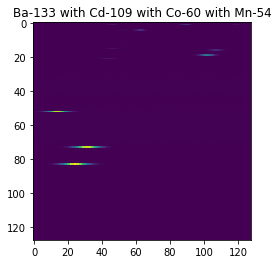

In [163]:
a, b = s[len(s)-10]
plt.imshow(a[0].reshape((128, 128)))
plt.title(" with ".join(binarizer.inverse_transform(np.array([b['nuclei'][0]]))[0]))
plt.show()

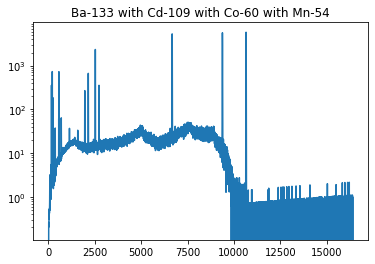

In [164]:
plt.title(" with ".join(binarizer.inverse_transform(np.array([b['nuclei'][0]]))[0]))
plt.plot(a[0].reshape(-1))
plt.yscale("log")
plt.show()

In [165]:
learning_rate = 1e-4
epochs = 250
batch_size = 32
steps_per_epoch = len(X) // batch_size + 1
validation_steps = len(X_test) // batch_size + 1

In [166]:
def accuracy_score_wrapper(label, pred):
    threshold = .85
    label = (label >= threshold).astype(np.uint8)
    pred = (pred >= threshold).astype(np.uint8)
    return np.float32(accuracy_score(label, pred))

def my_accuracy_score(label, pred):
    metric_value = tf.py_func(accuracy_score_wrapper, [label, pred], tf.float32)
    return metric_value

In [167]:
K.clear_session()

vgg_model = VGG19(include_top=False,
                  weights=None,
                  input_shape=(128, 128, 1),
                  classes=10)

x = keras.layers.Flatten()(vgg_model.output)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dense(4096, activation='relu')(x)

nuclei = keras.layers.Dense(10,
                            activation='sigmoid',
                            name="nuclei")(x)

counts = keras.layers.Dense(10,
                            activation=None,
                            name="counts")(x)

model = keras.models.Model(vgg_model.input, [nuclei, counts])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [122]:
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.utils.vis_utils.pydot = pyd

SVG(model_to_dot(model).create(prog='dot', format='svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [168]:
opt = SGD(lr=learning_rate,
          nesterov=True,
          momentum=0.9)

model.compile(optimizer=opt,
              loss={'nuclei': 'binary_crossentropy',
                    'counts': 'mse'},
              metrics={'nuclei': [my_accuracy_score, 'accuracy'],
                       'counts': 'mse'})

In [169]:
gerador_treino = EspectraSequence(X, y, batch_size=batch_size)
gerador_validacao = EspectraSequence(X_test, y_test, batch_size=batch_size)

callbacks = []

hist = model.fit_generator(generator=gerador_treino,
                           steps_per_epoch=steps_per_epoch,
                           epochs=epochs,
                           verbose=2,
                           callbacks=callbacks,
                           validation_data=gerador_validacao,
                           validation_steps=validation_steps,
                           shuffle=True)

Epoch 1/250
 - 29s - loss: nan - nuclei_loss: 0.8366 - counts_loss: nan - nuclei_my_accuracy_score: 0.0000e+00 - nuclei_acc: 0.7618 - counts_mean_squared_error: nan - val_loss: nan - val_nuclei_loss: 0.6913 - val_counts_loss: nan - val_nuclei_my_accuracy_score: 0.0000e+00 - val_nuclei_acc: 0.9000 - val_counts_mean_squared_error: nan
Epoch 2/250
 - 27s - loss: nan - nuclei_loss: 0.6912 - counts_loss: nan - nuclei_my_accuracy_score: 0.0000e+00 - nuclei_acc: 0.7735 - counts_mean_squared_error: nan - val_loss: nan - val_nuclei_loss: 0.6893 - val_counts_loss: nan - val_nuclei_my_accuracy_score: 0.0000e+00 - val_nuclei_acc: 0.9000 - val_counts_mean_squared_error: nan
Epoch 3/250
 - 27s - loss: nan - nuclei_loss: 0.6899 - counts_loss: nan - nuclei_my_accuracy_score: 0.0000e+00 - nuclei_acc: 0.7703 - counts_mean_squared_error: nan - val_loss: nan - val_nuclei_loss: 0.6874 - val_counts_loss: nan - val_nuclei_my_accuracy_score: 0.0000e+00 - val_nuclei_acc: 0.9000 - val_counts_mean_squared_error:

KeyboardInterrupt: 

In [ ]:
from keras.models import save_model
save_model(model, 'VGG-19-SGD-sigmoid-PENELOPE.hdf5')

In [ ]:
plt.plot(hist.history['my_accuracy_score'])
plt.plot(hist.history['val_my_accuracy_score'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Validando nos espectros criados com Penelope

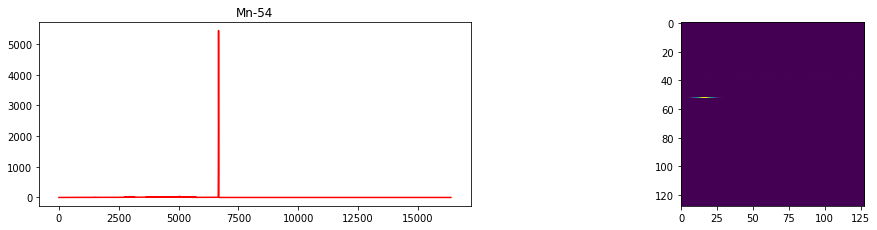

,radionuclideo,score,counts
0,Am-241,43.6262%,-0.0153%
1,Ba-133,37.4345%,0.0133%
2,Cd-109,42.2663%,0.0020%
3,Co-57,37.0408%,0.0341%
4,Co-60,26.5500%,-0.0055%
5,Cs-137,39.6674%,-0.0070%
6,Eu-152,35.6272%,-0.0172%
7,Mn-54,69.6007%,0.0114%
8,Na-22,15.5019%,-0.0152%
9,Pb-210,42.3967%,0.0052%


In [134]:
#x_, y_ = gerador_validacao[np.random.choice(len(gerador_validacao) - 1, 1)[0]]
idx = 0
f, axarr = plt.subplots(1, 2, figsize=(17, 1.7))
axarr[0].plot(range(len(x_[idx].reshape(-1))),
              x_[idx].reshape(-1), 'r')

axarr[0].set_title(" with ".join(binarizer.inverse_transform(np.array([y_['nuclei'][idx]]))[0]))
axarr[1].imshow(x_[0].reshape((128,128)))

plt.grid(False)
plt.subplots_adjust(bottom=1.25, top=2.75)
plt.show()

pred = model.predict(np.array([x_[idx].reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_,
                   'score': pred[0][0]*100,
                  'counts': pred[1][0]})
df

In [ ]:
#x_, y_ = gerador_validacao[np.random.choice(len(gerador_validacao) - 1, 1)[0]]
idx = 0
f, axarr = plt.subplots(2, 2, figsize=(17, 5))
axarr[0][0].plot(range(len(x_[idx].reshape(-1))),
              x_[idx].reshape(-1), 'r')

axarr[0][0].set_title(" with ".join(binarizer.inverse_transform(np.array([y_[idx]]))[0]))
axarr[0][1].imshow(x_[0].reshape((128,128)))

axarr[0][1].axis('off')
axarr[0][1].grid('off')

pred = model.predict(np.array([x_[idx].reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_,
                   'score': [str(x) for x in np.round(pred[0]*100, 2)]
                  })

axarr[1][0].axis('off')
axarr[1][0].axis('tight')

axarr[1][1].axis('off')
axarr[1][1].axis('tight')

tb1 = axarr[1][0].table(cellText=df.values[:5], colLabels=df.columns, loc='center')
tb2 = axarr[1][1].table(cellText=df.values[5:], colLabels=df.columns, loc='center')

color1 = "#cccccc"

for i in range(5):
    if float(df['score'][i]) > 50:
        tb1._cells[(i+1, 0)].set_facecolor(color1)
        tb1._cells[(i+1, 1)].set_facecolor(color1)
        
for i in range(5):
    if float(df['score'][i+5]) > 50:
        tb2._cells[(i+1, 0)].set_facecolor(color1)
        tb2._cells[(i+1, 1)].set_facecolor(color1)

plt.tight_layout()
plt.grid(False)
plt.subplots_adjust(bottom=1.25, top=2.75)
plt.show()

# Validando nos espectros experimentais

In [ ]:
def obtem_dados_dos_canais(linhas):
    dados = []
    pode_comecar = False
    for linha in linhas:
        if linha == "A004USERDEFINED                                                     \n":
            pode_comecar = True
            continue
        if pode_comecar:
            aux = linha.strip().split()
            if int(aux[1]) % 5:
                print("oi!")
            dados.extend([float(x) for x in aux[2:]])
    return dados[1:]

In [ ]:
arquivos = ['Am-241 - BG.IEC',
            'Ba-133 - BG.IEC',
            'Cd-109 - BG.IEC',
            'Co-57 - BG.IEC',
            'Co-60 - BG.IEC',
            'Cs-137 - BG.IEC',
            'Eu-152 - BG.IEC',
            'Mn-54 - BG.IEC',
            'Na-22 - BG.IEC',
            'Pb-210 - BG.IEC',]

df_nuclideos = dict()
img_espectros = dict()
img_convertidos = dict()
images = dict()

for arquivo in arquivos:
    print(arquivo)
    dados = []

    with open('/export/ipen/artigo/ICDA-3/Espectros/Experimentos/17-Maio-2018/Espectros/{0}'.format(arquivo), 'r') as f:
        dados = f.readlines()
    dados = obtem_dados_dos_canais(dados)
    df = pd.DataFrame({'channel': range(0, len(dados)), 'counts' : dados})
    df_nuclideos[arquivo] = df.copy()
    img_convertidos[arquivo] = np.array(dados).reshape((128, 128)).copy()
    images[arquivo.split(' ')[0]] = np.array(dados).reshape((128, 128)).copy()

In [ ]:
f, axarr = plt.subplots(10, 2, figsize=(15,25))
for n, arquivo in enumerate(arquivos):
    df = df_nuclideos[arquivo]
    axarr[n, 0].plot(df['channel'], df['counts'], 'r')
    axarr[n, 0].set_title("Espectro : {0}".format(arquivo))
    
    axarr[n, 1].imshow(img_convertidos[arquivo])
    #axarr[n, 1].set_title("Como Imagem : {0}".format(arquivo))
    
plt.grid(False)
plt.subplots_adjust(bottom=1.25, top=2.75)
plt.show()

In [ ]:
np.argmax(carrega_dados('../dados/Am-241_46cm_1-0e09estories_10-0.dat', 1e9)['counts'].values)

In [ ]:
578 - 424

In [ ]:
from scipy.ndimage.interpolation import shift

pred = model.predict(np.array([shift(images['Am-241'].reshape(-1), -154, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([np.roll(images['Ba-133'], 401).reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Ba-133'].reshape(-1), -154, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([images['Cd-109'].reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Cd-109'].reshape(-1), -154, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([images['Co-57'].reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Co-57'].reshape(-1), -154, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([images['Co-60'].reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Co-60'].reshape(-1), -155, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([images['Cs-137'].reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Cs-137'].reshape(-1), -155, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
#pred = model.predict(np.array([images['Eu-152'].reshape((128, 128, 1))]))
pred = model.predict(np.array([shift(images['Eu-152'].reshape(-1), -155, cval=0).reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
pred = model.predict(np.array([images['Mn-54'].reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
pred = model.predict(np.array([images['Na-22'].reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

In [ ]:
pred = model.predict(np.array([images['Pb-210'].reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df

## Fonte triplice de calibração

In [ ]:
dados = []

with open('/export/ipen/artigo/ICDA-3/Espectros/Experimentos/17-Maio-2018/Espectros/Am-Cs-Co - BG.IEC', 'r') as f:
    dados = f.readlines()
dados = obtem_dados_dos_canais(dados)
df_triplice = pd.DataFrame({'channel': range(0, len(dados)), 'counts' : dados})

In [ ]:
f, axarr = plt.subplots(1, 2, figsize=(17, 3))
axarr[0].plot(df_triplice['channel'], df_triplice.counts.shift(-145).fillna(0).values, 'r')
axarr[0].set_title("Espectro de calibração")
axarr[1].imshow(np.array(dados).reshape((128,128)))

plt.grid(False)
plt.subplots_adjust(bottom=1.25, top=2.75)
plt.show()

In [ ]:
np.argmax(df_triplice.counts) - 424

In [ ]:
dados = df_triplice.counts.shift(-160).fillna(0).values
pred = model.predict(np.array([dados.reshape((128, 128, 1))]))
df = pd.DataFrame({'radionuclideo':binarizer.classes_, 'score': pred[0]*100})
df